In [257]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [258]:
img = cv2.imread('../neural-chessboard-draft/ChessBot/move5_mod.jpg')

In [259]:
type(img)

numpy.ndarray

In [260]:
img.shape

(1200, 1200, 3)

In [261]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

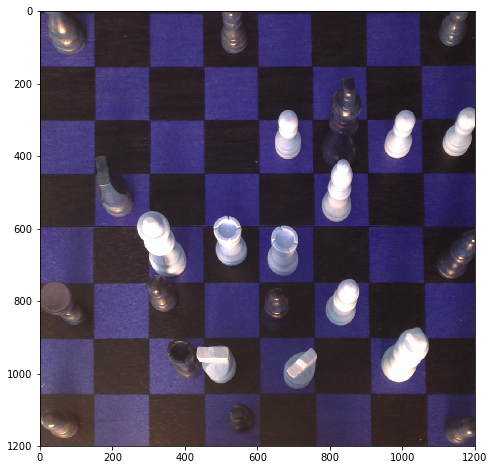

In [262]:
display(img)

In [263]:
blur_chess = cv2.medianBlur(img,15)

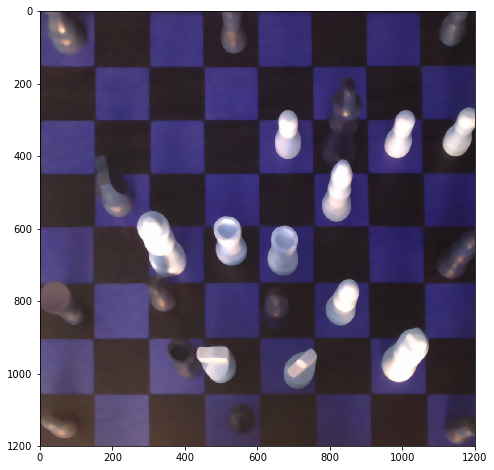

In [264]:
display(blur_chess)

In [265]:
gray = cv2.cvtColor(blur_chess,cv2.COLOR_BGR2GRAY)

In [266]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

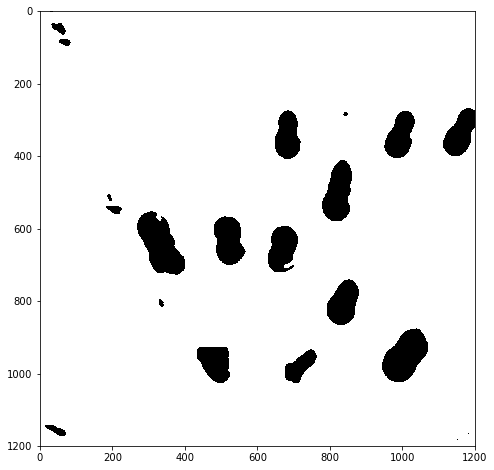

In [267]:
display(thresh,cmap='gray')

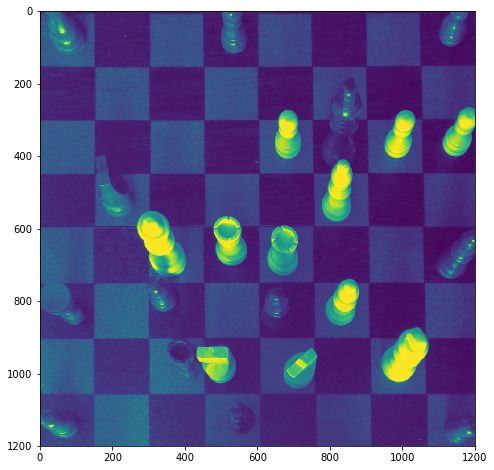

In [268]:
img = cv2.imread('../neural-chessboard-draft/ChessBot/move5_mod.jpg',0)
display(img)
blur = cv2.GaussianBlur(img,(5,5),0)
_, img_binary = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

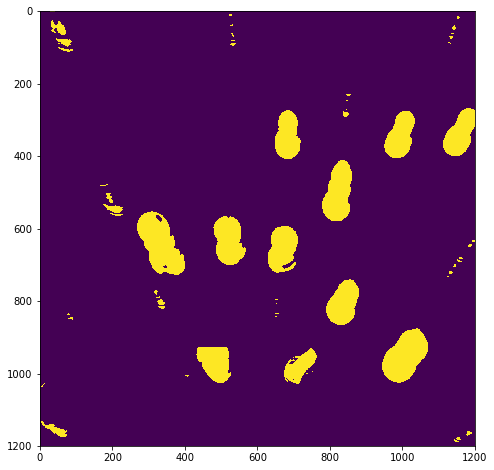

In [13]:
display(img_binary)

In [14]:
small_img = img[0:int(img.shape[0]/8),0:int(img.shape[1]/8)]

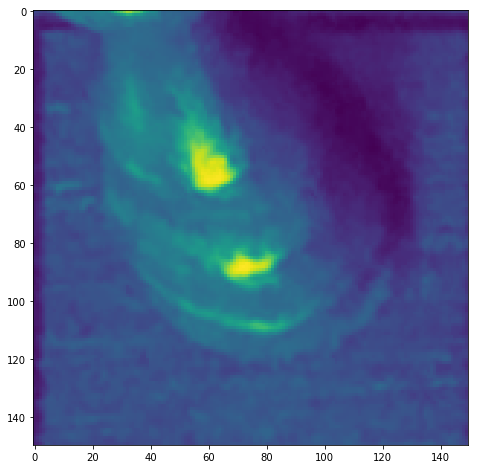

In [15]:
display(small_img)
blur = cv2.GaussianBlur(small_img,(5,5),0)
_, img_binary = cv2.threshold(small_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

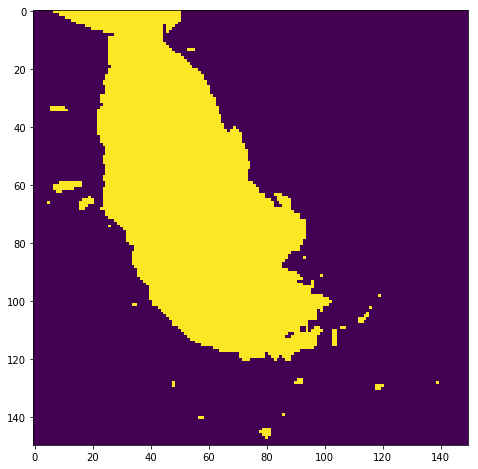

In [16]:
display(img_binary)

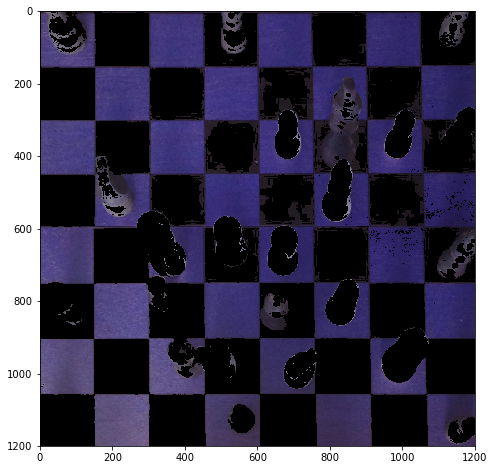

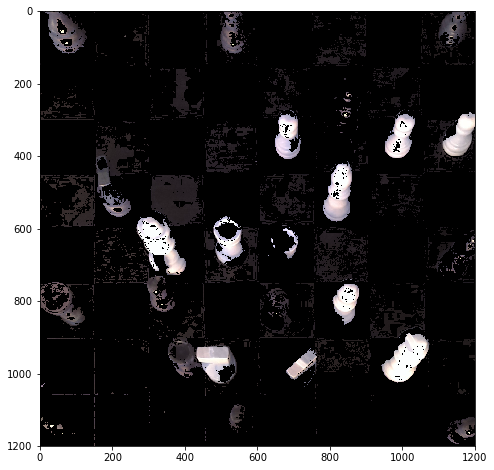

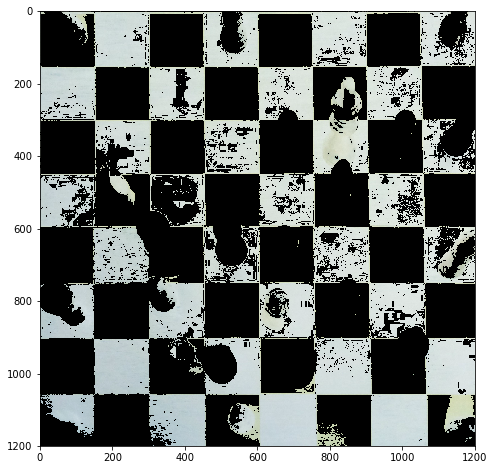

In [17]:
img = cv2.imread('../neural-chessboard-draft/ChessBot/move5_mod.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask_red = cv2.inRange(hsv, (150, 25, 25), (255, 175, 160))
mask_white = cv2.inRange(hsv, (20,0,0),(255,50,255))
mask_black = cv2.inRange(hsv, (100,50,30),(255,140,80))

imask_red = mask_red>0
red = np.zeros_like(img, np.uint8)
red[imask_red] = img[imask_red]

imask_white = mask_white>0
white = np.zeros_like(img, np.uint8)
white[imask_white] = img[imask_white]

imask_black = mask_black>0
black = np.zeros_like(img, np.uint8)
inverse = cv2.bitwise_not(img)
black[imask_black] = inverse[imask_black]

display(red)
display(white)
display(black)

In [30]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(gray,cv2.CV_64F)

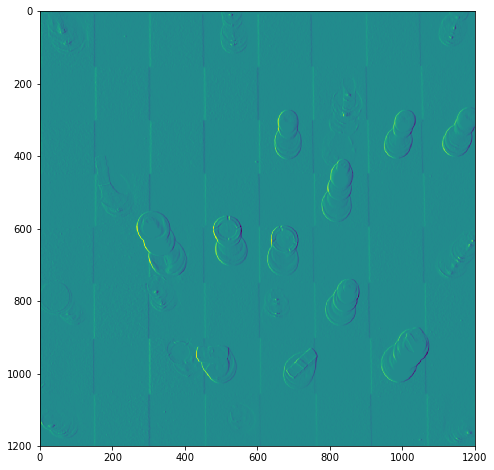

In [31]:
display(sobelx)

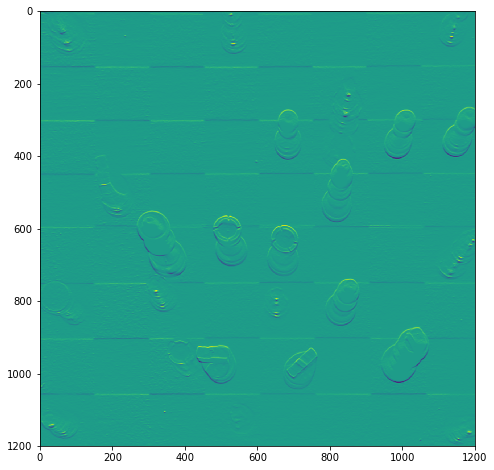

In [32]:
display(sobely)

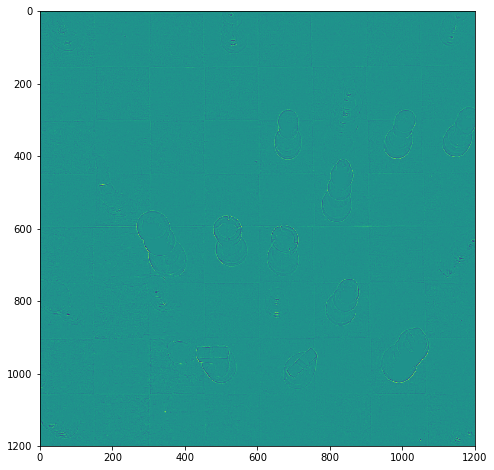

In [33]:
display(laplacian)

In [34]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

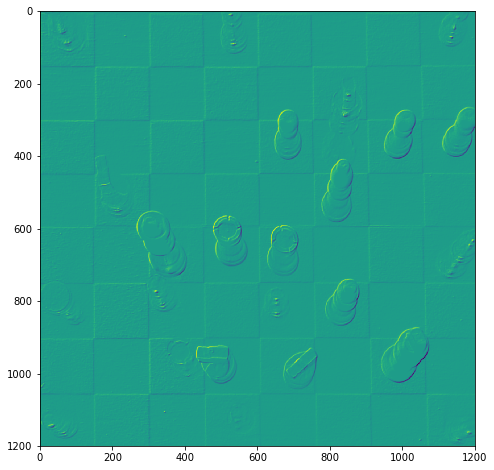

In [35]:
display(blended)

In [36]:
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

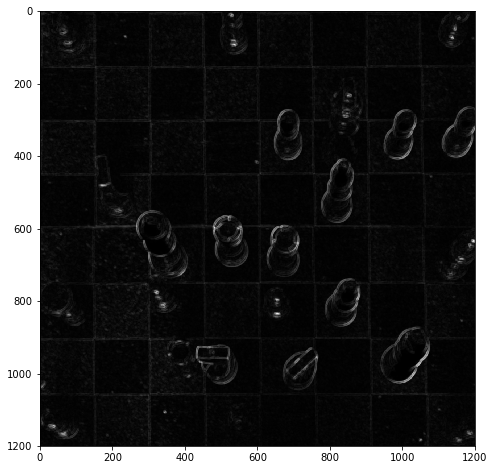

In [37]:
display(gradient,'gray')

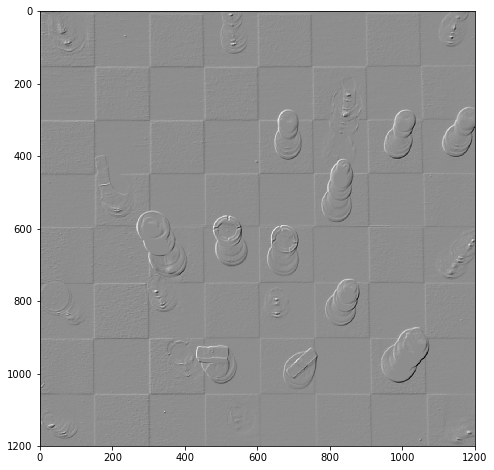

In [38]:
ret,th1 = cv2.threshold(gradient,100,255,cv2.THRESH_BINARY)
display(blended,'gray')

In [39]:
kernel = np.ones((2,2),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

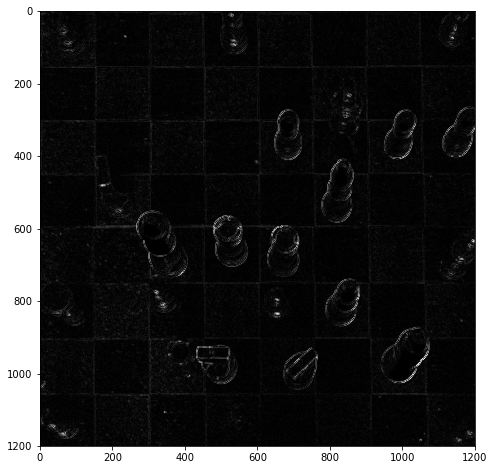

In [40]:
display(gradient,'gray')

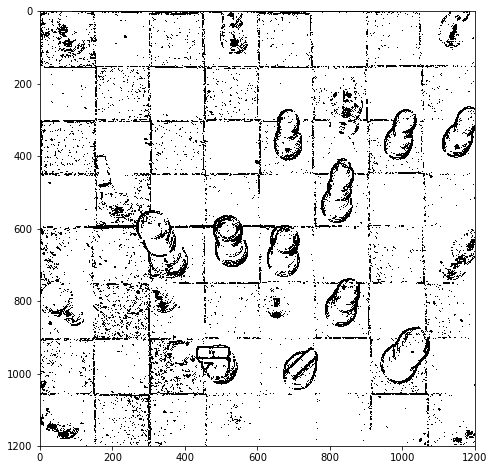

In [41]:
ret,th1 = cv2.threshold(gradient,200,255,cv2.THRESH_BINARY_INV)
display(th1,'gray')

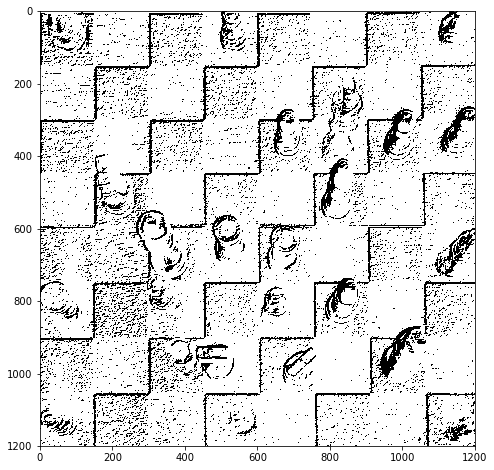

In [42]:
ret,th1 = cv2.threshold(blended,100,255,cv2.THRESH_BINARY_INV)
display(th1,'gray')

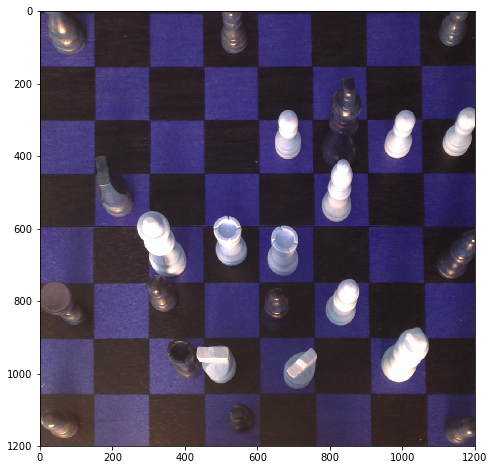

In [43]:
img = cv2.imread('../neural-chessboard-draft/ChessBot/move5_mod.jpg')

hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_red = np.array([45,100,50])
upper_red = np.array([75,255,255])

mask = cv2.inRange(hsv,lower_red,upper_red)

kernel = np.ones((5,5),np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

contours, hierarchy,extra = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
display(img)

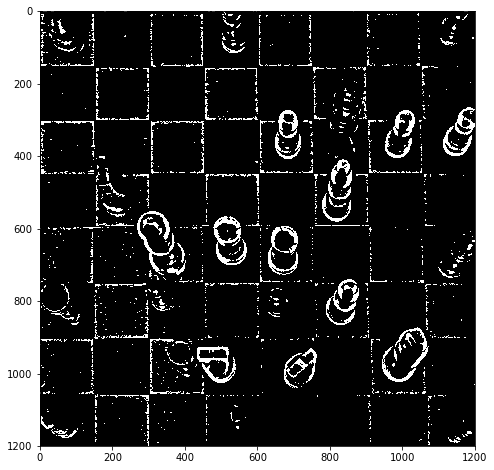

In [65]:
img = cv2.imread('../neural-chessboard-draft/ChessBot/move5_mod.jpg',0)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,-10)
display(th2,'gray')

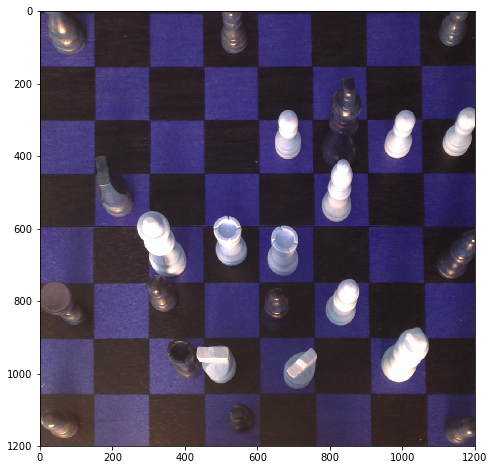

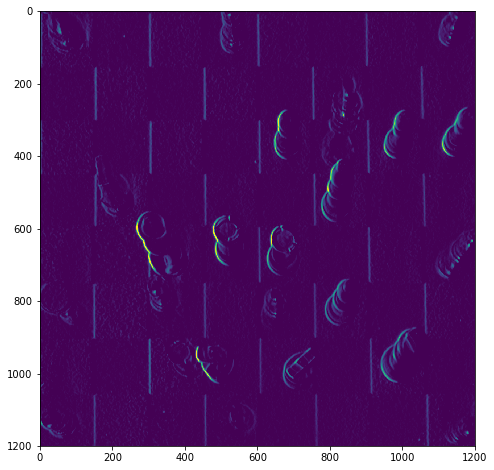

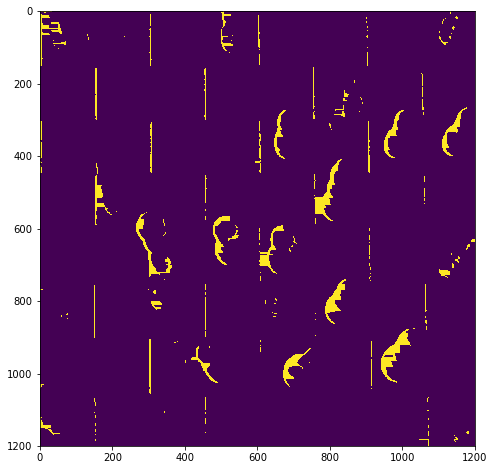

In [66]:
img = cv2.imread('../neural-chessboard-draft/ChessBot/move5_mod.jpg')

imgBlurred = cv2.GaussianBlur(img, (7,7),0)
gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=3)

ret,threshold_img = cv2.threshold(sobelx, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

morph_img_threshold = threshold_img.copy()
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(22,3))
cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)

display(img)
display(sobelx)
display(morph_img_threshold)

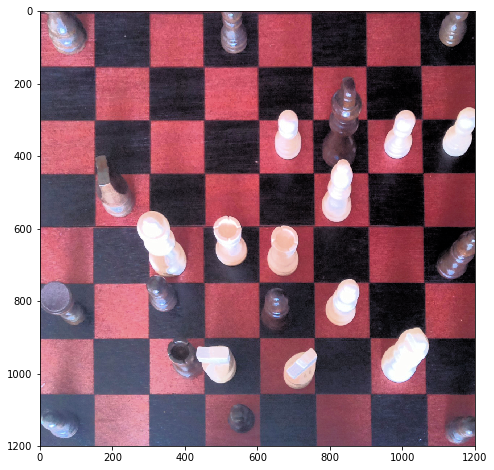

In [70]:
img = cv2.imread('../neural-chessboard-draft/ChessBot/move5_mod.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
eq_img = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
display(eq_img)

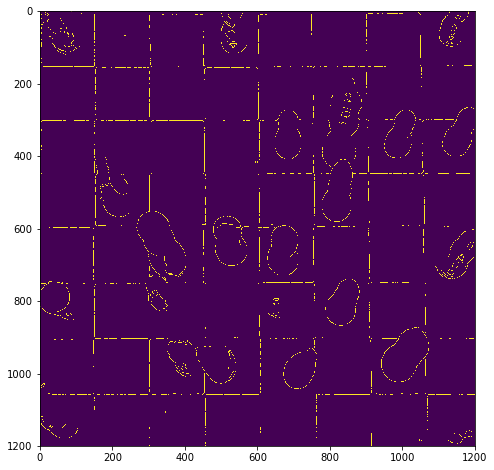

In [73]:
med_val = np.median(eq_img)
lower = int(max(0,0.7*med_val))
upper = int(min(255,1.3*med_val))

blurred_img = cv2.blur(eq_img,ksize=(5,5))
edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper+50)
display(edges)

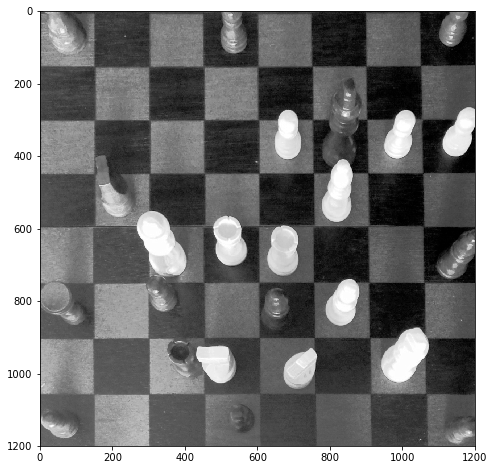

In [76]:
grayness = cv2.cvtColor(eq_img,cv2.COLOR_RGB2GRAY)
display(grayness,'gray')

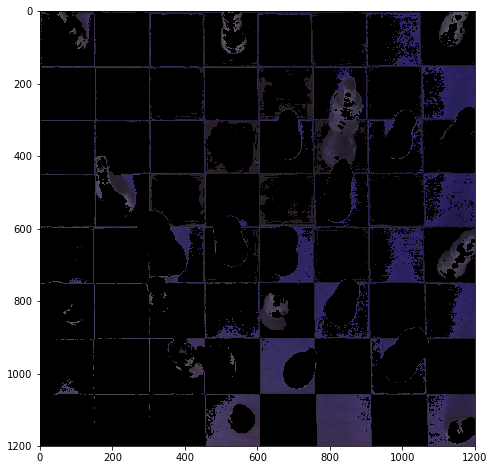

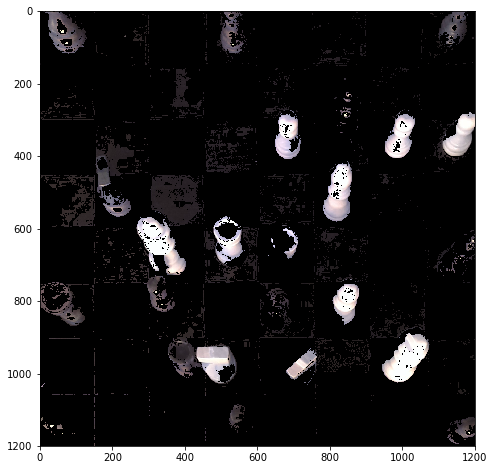

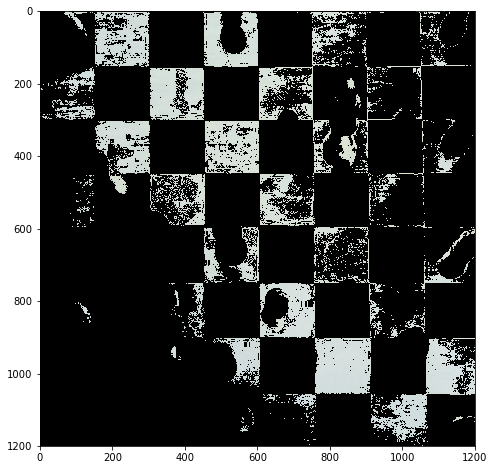

In [77]:
hsv = cv2.cvtColor(eq_img, cv2.COLOR_RGB2HSV)

mask_red = cv2.inRange(hsv, (150, 25, 25), (255, 175, 160))
mask_white = cv2.inRange(hsv, (20,0,0),(255,50,255))
mask_black = cv2.inRange(hsv, (100,50,30),(255,140,80))

imask_red = mask_red>0
red = np.zeros_like(img, np.uint8)
red[imask_red] = img[imask_red]

imask_white = mask_white>0
white = np.zeros_like(img, np.uint8)
white[imask_white] = img[imask_white]

imask_black = mask_black>0
black = np.zeros_like(img, np.uint8)
inverse = cv2.bitwise_not(img)
black[imask_black] = inverse[imask_black]

display(red)
display(white)
display(black)

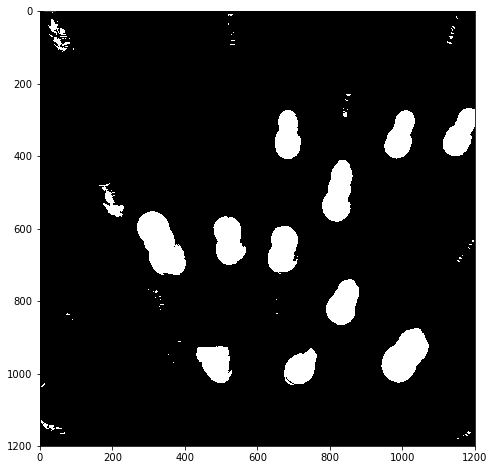

In [154]:
ret, thresh = cv2.threshold(grayness, 200, 255, 0)
image,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

external_contours = np.zeros(image.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)
        
display(external_contours,'gray')

In [155]:
cnt = contours[114]
M = cv2.moments(cnt)
print(M)

{'m00': 14618.0, 'm10': 4869942.0, 'm01': 9395308.666666666, 'm20': 1636555102.6666665, 'm11': 3141637384.9166665, 'm02': 6069894839.0, 'm30': 554678758534.2001, 'm21': 1059623108377.2, 'm12': 2037081080467.9, 'm03': 3941438547987.6, 'mu20': 14148817.034979582, 'mu11': 11619032.285390377, 'mu02': 31324245.07868576, 'mu30': 38160200.04785156, 'mu21': 31620744.57943344, 'mu12': -21437078.12218094, 'mu03': -81324029.16699219, 'nu20': 0.06621314483484453, 'nu11': 0.05437434561852739, 'nu02': 0.1465901192382038, 'nu30': 0.0014770348719485842, 'nu21': 0.0012239176514335876, 'nu12': -0.0008297470112694018, 'nu03': -0.003147741019606472}


In [156]:
area = cv2.contourArea(cnt)

In [157]:
area

14618.0

In [186]:
x,y,w,h = cv2.boundingRect(cnt)
external_contours = external_contours.astype('uint8')
gray_contours = cv2.cvtColor(external_contours,cv2.COLOR_GRAY2RGB)
squares = []

for i in contours:
    if cv2.contourArea(i) > 5000:
        x,y,w,h = cv2.boundingRect(i)
        cv2.rectangle(gray_contours,(x,y),(x+w,y+h),(0,255,0),2)
        
        cx = int(cv2.moments(i)['m10']/cv2.moments(i)['m00'])
        cy = int(cv2.moments(i)['m01']/cv2.moments(i)['m00'])
        cv2.circle(gray_contours,(cx,cy),15,(255,0,0),-1)
        squares.append((cx,cy))

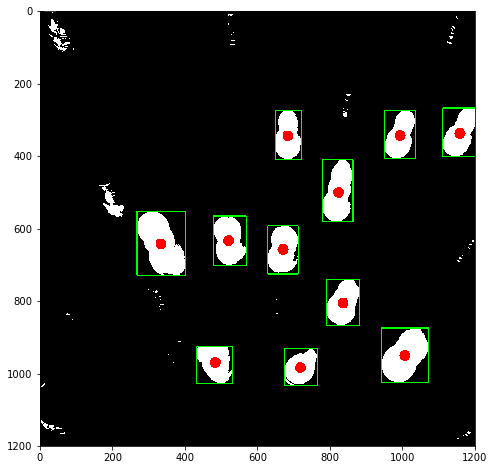

In [181]:
display(gray_contours)

In [182]:
the_sum = 0
max_val = 0
max_n = 0

for n,num in enumerate(contours):
    the_sum += cv2.contourArea(num)
    if max_val < cv2.contourArea(num):
        max_val = cv2.contourArea(num)
        max_n = n
        
print(the_sum)
print(max_val)
print(max_n)

103808.5
14618.0
114


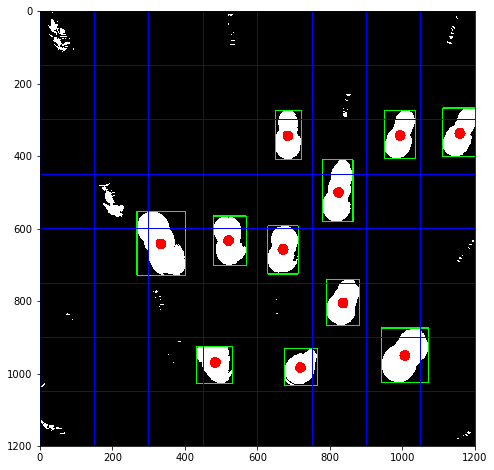

In [183]:
x = gray_contours.shape[0]
y = gray_contours.shape[1]
x_interval = int(x/8)
y_interval = int(x/8)
more_line = gray_contours

for i in range(8):
    cv2.line(more_line,(0+i*x_interval,0),(0+i*x_interval,y),(0,0,255),2)
    cv2.line(more_line,(0,0+i*y_interval),(x,0+i*y_interval),(0,0,255),2)

display(more_line)

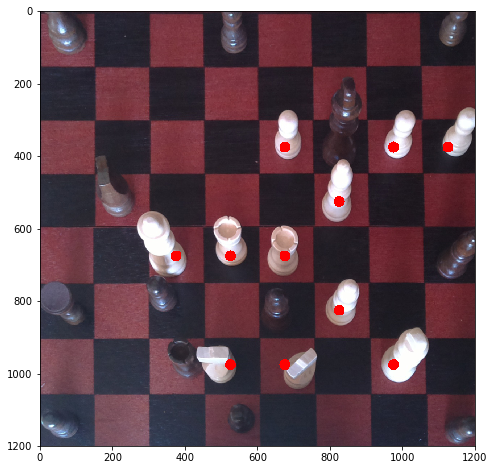

In [245]:
# blank_img = np.zeros(gray_contours.shape[:2]).astype('uint8')
# blank_img = cv2.cvtColor(blank_img,cv2.COLOR_GRAY2RGB)
final_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
for i in squares:
    start_x = int(i[0]/x_interval)*x_interval
    start_y = int(i[1]/y_interval)*y_interval
    cv2.circle(final_img,(start_x+int(x_interval/2),start_y+int(y_interval/2)),15,(255,0,0),-1)
    #cv2.rectangle(blank_img,(start_x,start_y),(start_x+x_interval,start_y+y_interval),(255,255,255),-1)
display(final_img)

CONSOLIDATED

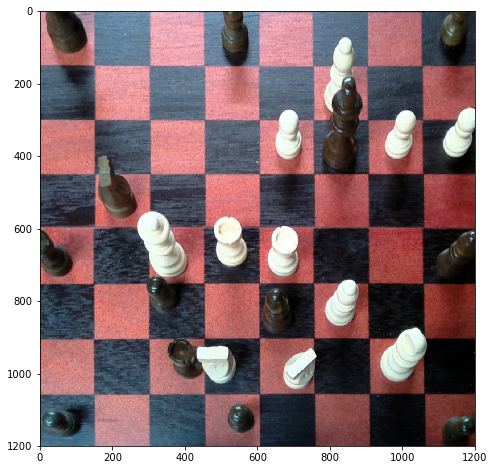

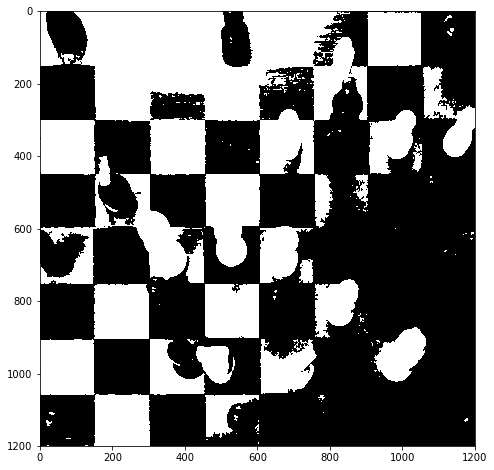

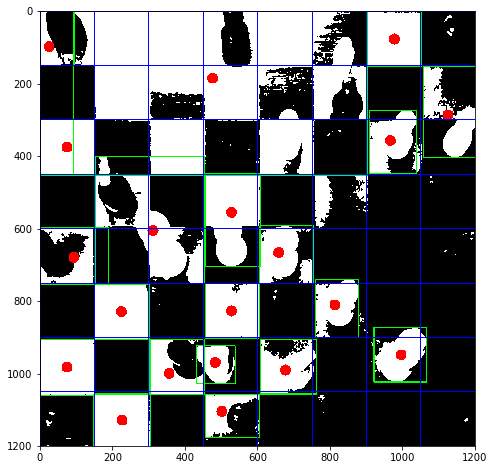

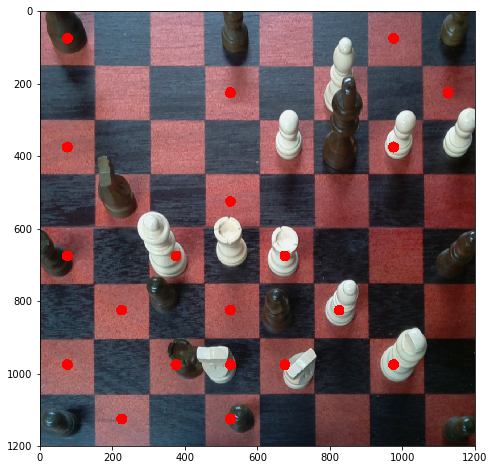

In [271]:
img = cv2.imread('../neural-chessboard-draft/ChessBot/primary3.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:, :, 2] = cv2.equalizeHist(hsv[:, :, 2])
eq_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_img)
grayness = cv2.cvtColor(eq_img,cv2.COLOR_RGB2GRAY)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
_, img_binary = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

ret, thresh = cv2.threshold(grayness, 200, 255, 0)
ret,contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

external_contours = np.zeros(thresh.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)

display(external_contours, 'gray')

external_contours = external_contours.astype('uint8')
gray_contours = cv2.cvtColor(external_contours, cv2.COLOR_GRAY2RGB)
squares = []

for i in contours:
    if cv2.contourArea(i) > 5000:
        x, y, w, h = cv2.boundingRect(i)
        cv2.rectangle(gray_contours, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cx = int(cv2.moments(i)['m10'] / cv2.moments(i)['m00'])
        cy = int(cv2.moments(i)['m01'] / cv2.moments(i)['m00'])
        cv2.circle(gray_contours, (cx, cy), 15, (255, 0, 0), -1)
        squares.append((cx, cy))

the_sum = 0
max_val = 0
max_n = 0

for n, num in enumerate(contours):
    the_sum += cv2.contourArea(num)
    if max_val < cv2.contourArea(num):
        max_val = cv2.contourArea(num)
        max_n = n

x = gray_contours.shape[0]
y = gray_contours.shape[1]
x_interval = int(x / 8)
y_interval = int(x / 8)
more_line = gray_contours

for i in range(8):
    cv2.line(more_line, (0 + i * x_interval, 0), (0 + i * x_interval, y), (0, 0, 255), 2)
    cv2.line(more_line, (0, 0 + i * y_interval), (x, 0 + i * y_interval), (0, 0, 255), 2)

display(more_line)

# blank_img = np.zeros(gray_contours.shape[:2]).astype('uint8')
# blank_img = cv2.cvtColor(blank_img,cv2.COLOR_GRAY2RGB)
final_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for i in squares:
    start_x = int(i[0] / x_interval) * x_interval
    start_y = int(i[1] / y_interval) * y_interval
    cv2.circle(final_img, (start_x + int(x_interval / 2), start_y + int(y_interval / 2)), 15, (255, 0, 0), -1)
    # cv2.rectangle(blank_img,(start_x,start_y),(start_x+x_interval,start_y+y_interval),(255,255,255),-1)
# final_img = cv2.cvtColor(final_img,cv2.COLOR_RGB2BGR)
# cv2.imshow('image',final_img)
# k = cv2.waitKey(0)
# if k == 27:
#     cv2.destroyAllWindows()
# elif k == ord('s'):
#     cv2.imwrite('messingwithstuff.png',final_img)
#     cv2.destroyAllWindows()
display(final_img)

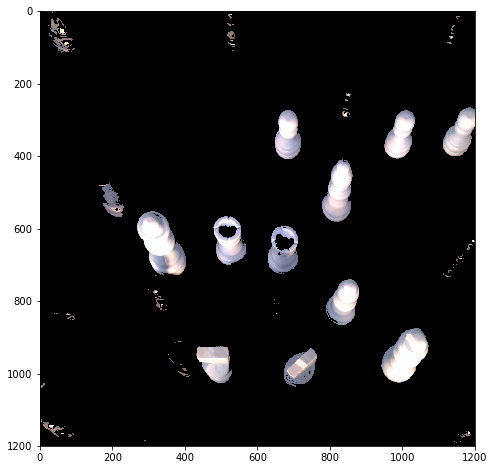

In [296]:
img = cv2.imread('../neural-chessboard-draft/ChessBot/move5_mod.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h_low = 0 * 255 / 360
h_high = 350 * 255 / 360
s_low = 0 * 255 / 100
s_high = 25 * 255 / 100
v_low = 50 * 255 / 100
v_high = 100 * 255 / 100

# mask_red = cv2.inRange(hsv, (150, 25, 25), (255, 175, 160))
mask_white = cv2.inRange(hsv, (h_low,s_low,v_low),(h_high,s_high,v_high))
# mask_black = cv2.inRange(hsv, (100,50,30),(255,140,80))

# imask_red = mask_red>0
# red = np.zeros_like(img, np.uint8)
# red[imask_red] = img[imask_red]

imask_white = mask_white>0
white = np.zeros_like(img, np.uint8)
white[imask_white] = img[imask_white]

# imask_black = mask_black>0
# black = np.zeros_like(img, np.uint8)
# inverse = cv2.bitwise_not(img)
# black[imask_black] = inverse[imask_black]

# display(red)
display(white)
# display(black)

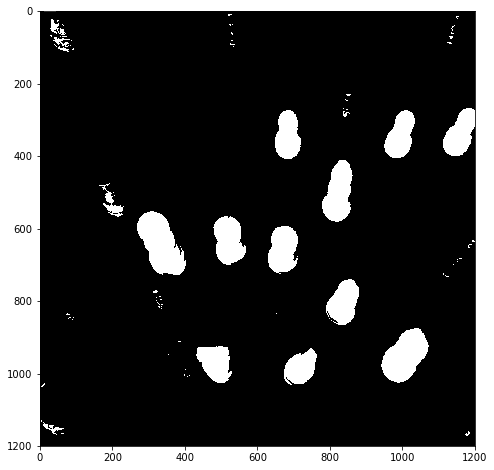

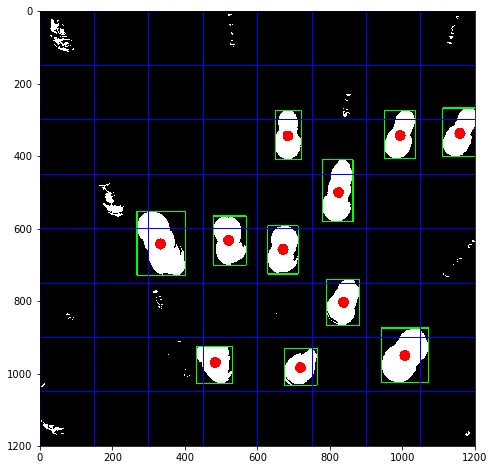

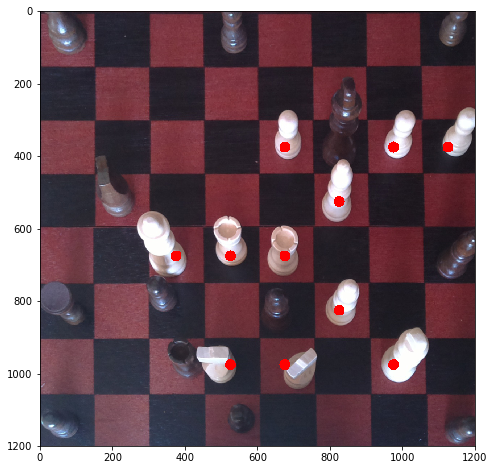

In [297]:
gray = cv2.cvtColor(white,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 120, 255, 0)
ret,contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

external_contours = np.zeros(thresh.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)

display(external_contours, 'gray')

external_contours = external_contours.astype('uint8')
gray_contours = cv2.cvtColor(external_contours, cv2.COLOR_GRAY2RGB)
squares = []

for i in contours:
    if cv2.contourArea(i) > 5000:
        x, y, w, h = cv2.boundingRect(i)
        cv2.rectangle(gray_contours, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cx = int(cv2.moments(i)['m10'] / cv2.moments(i)['m00'])
        cy = int(cv2.moments(i)['m01'] / cv2.moments(i)['m00'])
        cv2.circle(gray_contours, (cx, cy), 15, (255, 0, 0), -1)
        squares.append((cx, cy))

the_sum = 0
max_val = 0
max_n = 0

for n, num in enumerate(contours):
    the_sum += cv2.contourArea(num)
    if max_val < cv2.contourArea(num):
        max_val = cv2.contourArea(num)
        max_n = n

x = gray_contours.shape[0]
y = gray_contours.shape[1]
x_interval = int(x / 8)
y_interval = int(x / 8)
more_line = gray_contours

for i in range(8):
    cv2.line(more_line, (0 + i * x_interval, 0), (0 + i * x_interval, y), (0, 0, 255), 2)
    cv2.line(more_line, (0, 0 + i * y_interval), (x, 0 + i * y_interval), (0, 0, 255), 2)

display(more_line)

# blank_img = np.zeros(gray_contours.shape[:2]).astype('uint8')
# blank_img = cv2.cvtColor(blank_img,cv2.COLOR_GRAY2RGB)
final_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for i in squares:
    start_x = int(i[0] / x_interval) * x_interval
    start_y = int(i[1] / y_interval) * y_interval
    cv2.circle(final_img, (start_x + int(x_interval / 2), start_y + int(y_interval / 2)), 15, (255, 0, 0), -1)
    # cv2.rectangle(blank_img,(start_x,start_y),(start_x+x_interval,start_y+y_interval),(255,255,255),-1)
# final_img = cv2.cvtColor(final_img,cv2.COLOR_RGB2BGR)
# cv2.imshow('image',final_img)
# k = cv2.waitKey(0)
# if k == 27:
#     cv2.destroyAllWindows()
# elif k == ord('s'):
#     cv2.imwrite('messingwithstuff.png',final_img)
#     cv2.destroyAllWindows()
display(final_img)

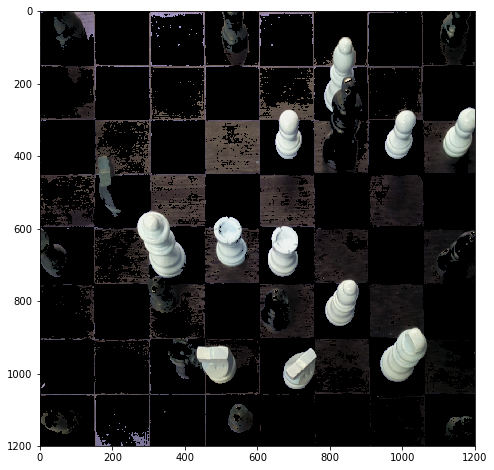

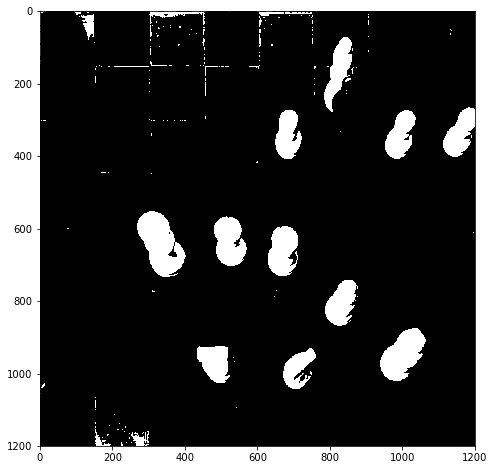

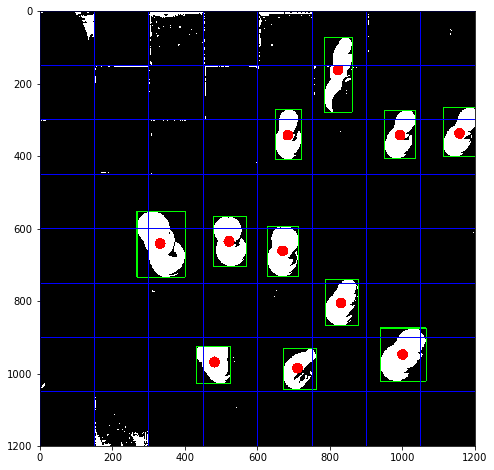

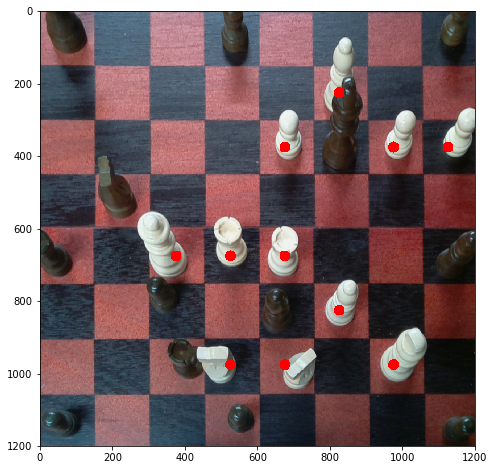

In [307]:
img = cv2.imread('../neural-chessboard-draft/ChessBot/primary3.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h_low = 0 * 255 / 360
h_high = 350 * 255 / 360
s_low = 0 * 255 / 100
s_high = 25 * 255 / 100
v_low = 0 * 255 / 100
v_high = 100 * 255 / 100

# mask_red = cv2.inRange(hsv, (150, 25, 25), (255, 175, 160))
mask_white = cv2.inRange(hsv, (h_low,s_low,v_low),(h_high,s_high,v_high))
# mask_black = cv2.inRange(hsv, (100,50,30),(255,140,80))

# imask_red = mask_red>0
# red = np.zeros_like(img, np.uint8)
# red[imask_red] = img[imask_red]

imask_white = mask_white>0
white = np.zeros_like(img, np.uint8)
white[imask_white] = img[imask_white]

# imask_black = mask_black>0
# black = np.zeros_like(img, np.uint8)
# inverse = cv2.bitwise_not(img)
# black[imask_black] = inverse[imask_black]

# display(red)
display(white)
# display(black)

gray = cv2.cvtColor(white,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 120, 255, 0)
ret,contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

external_contours = np.zeros(thresh.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)

display(external_contours, 'gray')

external_contours = external_contours.astype('uint8')
gray_contours = cv2.cvtColor(external_contours, cv2.COLOR_GRAY2RGB)
squares = []

for i in contours:
    if cv2.contourArea(i) > 5000:
        x, y, w, h = cv2.boundingRect(i)
        cv2.rectangle(gray_contours, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cx = int(cv2.moments(i)['m10'] / cv2.moments(i)['m00'])
        cy = int(cv2.moments(i)['m01'] / cv2.moments(i)['m00'])
        cv2.circle(gray_contours, (cx, cy), 15, (255, 0, 0), -1)
        squares.append((cx, cy))

the_sum = 0
max_val = 0
max_n = 0

for n, num in enumerate(contours):
    the_sum += cv2.contourArea(num)
    if max_val < cv2.contourArea(num):
        max_val = cv2.contourArea(num)
        max_n = n

x = gray_contours.shape[0]
y = gray_contours.shape[1]
x_interval = int(x / 8)
y_interval = int(x / 8)
more_line = gray_contours

for i in range(8):
    cv2.line(more_line, (0 + i * x_interval, 0), (0 + i * x_interval, y), (0, 0, 255), 2)
    cv2.line(more_line, (0, 0 + i * y_interval), (x, 0 + i * y_interval), (0, 0, 255), 2)

display(more_line)

# blank_img = np.zeros(gray_contours.shape[:2]).astype('uint8')
# blank_img = cv2.cvtColor(blank_img,cv2.COLOR_GRAY2RGB)
final_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for i in squares:
    start_x = int(i[0] / x_interval) * x_interval
    start_y = int(i[1] / y_interval) * y_interval
    cv2.circle(final_img, (start_x + int(x_interval / 2), start_y + int(y_interval / 2)), 15, (255, 0, 0), -1)
    # cv2.rectangle(blank_img,(start_x,start_y),(start_x+x_interval,start_y+y_interval),(255,255,255),-1)
# final_img = cv2.cvtColor(final_img,cv2.COLOR_RGB2BGR)
# cv2.imshow('image',final_img)
# k = cv2.waitKey(0)
# if k == 27:
#     cv2.destroyAllWindows()
# elif k == ord('s'):
#     cv2.imwrite('messingwithstuff.png',final_img)
#     cv2.destroyAllWindows()
display(final_img)

In [298]:
0.islower()

SyntaxError: invalid syntax (<ipython-input-298-f94234d87c5e>, line 1)

In [299]:
'0'.islower()

False

In [300]:
''.islower()

False

In [301]:
'a'.islower()

True

In [391]:
starting_board = [['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r'],
                  ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
                  ['', '', '', '', '', '', '', ''],
                  ['', '', '', '', '', '', '', ''],
                  ['', '', '', '', '', '', '', ''],
                  ['', '', '', '', '', '', '', ''],
                  ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
                  ['R', 'N', 'B', 'K', 'Q', 'B', 'N', 'R']]

current_board = starting_board

In [392]:
def findMove():
    captured = ''
    moved_piece = ''
    move_start = ()
    move_end = ()
    moved = False
    for row_index,row in enumerate(current_board):
        for col_index,item in enumerate(row):
            if (col_index,row_index) not in pieces and item.islower():
                moved_piece = item
                moved = True
                move_start = (col_index,row_index)

    for spot in pieces:
        if (current_board[spot[1]][spot[0]].islower()) is False and moved:
            captured = current_board[spot[1]][spot[0]]
            current_board[spot[1]][spot[0]] = moved_piece
            move_end = spot
        print('{} is the piece at {}'.format(current_board[spot[1]][spot[0]],spot))
    print('The moved piece is {} and it moved from {} to {}'.format(moved_piece,move_start,move_end))
    if captured != '':
        print('And it captured {}'.format(captured))

In [393]:
starting_board[0][1]

'n'

In [394]:
pieces = [(0,0),(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(0,1),(1,1),(2,1),(3,1),(4,1),(5,1),(6,1),(7,6)]

In [395]:
findMove()

r is the piece at (0, 0)
n is the piece at (1, 0)
b is the piece at (2, 0)
q is the piece at (3, 0)
k is the piece at (4, 0)
b is the piece at (5, 0)
n is the piece at (6, 0)
r is the piece at (7, 0)
p is the piece at (0, 1)
p is the piece at (1, 1)
p is the piece at (2, 1)
p is the piece at (3, 1)
p is the piece at (4, 1)
p is the piece at (5, 1)
p is the piece at (6, 1)
p is the piece at (7, 6)
The moved piece is p and it moved from (7, 1) to (7, 6)
And it captured P


In [326]:
pieces[0][1]

0

In [332]:
n = (2,1)
print(n[1])

1


In [414]:
pathe = r"C:\Users\kyle\anaconda3\Lib\site-packages"
print(pathe)

C:\Users\kyle\anaconda3\Lib\site-packages


In [402]:
nohelo = "hello'\'"

In [412]:
helpreally = "hello \\u"

In [410]:
helpreally

"hello '\\'u"

In [3]:
import chess